In [105]:
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
import h5py
import cv2 as cv

In [76]:
from keras.layers import Dense,Conv2D,MaxPool2D,Activation,Flatten
from keras.optimizers import SGD

In [65]:
train_set=h5py.File('train_signs.h5','r')
test_set=h5py.File('test_signs.h5','r')

In [66]:
train_set.keys()

<KeysViewHDF5 ['list_classes', 'train_set_x', 'train_set_y']>

In [67]:
test_set.keys()

<KeysViewHDF5 ['list_classes', 'test_set_x', 'test_set_y']>

In [68]:
X_train = np.array(train_set['train_set_x'])
y_train = np.array(train_set['train_set_y'])
X_test = np.array(test_set['test_set_x'])
y_test=np.array(test_set['test_set_y'])

In [69]:
X_train.shape

(1080, 64, 64, 3)

In [70]:
X_train=X_train/255
X_test=X_test/255

In [71]:
y_train=keras.utils.to_categorical(y_train)
y_test=keras.utils.to_categorical(y_test)

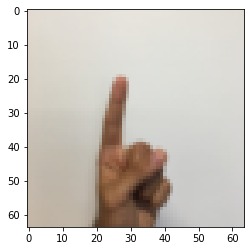

In [72]:
plt.imshow(X_test[4])

In [93]:
model = Sequential()
model.add(Conv2D(8,(4,4),padding='same'))
model.add(Activation('relu'))
model.add(MaxPool2D((8,8),strides=(8,8),padding='same'))
model.add(Conv2D(16,(2,2),padding='same',strides=(1,1)))
model.add(Activation('relu'))
model.add(MaxPool2D((4,4),strides=(4,4),padding='same'))
model.add(Flatten())
model.add(Dense(6,))#6 output for softmax
model.add(Activation('softmax'))

In [111]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 64, 64, 8)         392       
_________________________________________________________________
activation_5 (Activation)    (None, 64, 64, 8)         0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 8)           0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 8, 8, 16)          528       
_________________________________________________________________
activation_6 (Activation)    (None, 8, 8, 16)          0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 2, 2, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 64)              

In [97]:
model.compile(optimizer='SGD',loss='categorical_crossentropy',metrics=['accuracy'])

In [131]:
model.fit(X_train,y_train,epochs=200,validation_data=(X_test,y_test))

Train on 1080 samples, validate on 120 samples
Epoch 1/200
1080/1080 [==============================] - 1s 722us/step - loss: 0.5703 - accuracy: 0.7769 - val_loss: 0.5819 - val_accuracy: 0.7417
Epoch 2/200
1080/1080 [==============================] - 1s 730us/step - loss: 0.5577 - accuracy: 0.7963 - val_loss: 0.5618 - val_accuracy: 0.7833
Epoch 3/200
1080/1080 [==============================] - 1s 733us/step - loss: 0.5790 - accuracy: 0.7889 - val_loss: 0.6545 - val_accuracy: 0.7417
Epoch 4/200
1080/1080 [==============================] - 1s 717us/step - loss: 0.5791 - accuracy: 0.7852 - val_loss: 0.5728 - val_accuracy: 0.7500
Epoch 5/200
1080/1080 [==============================] - 1s 735us/step - loss: 0.5309 - accuracy: 0.8093 - val_loss: 0.5946 - val_accuracy: 0.7500
Epoch 6/200
1080/1080 [==============================] - 1s 795us/step - loss: 0.5506 - accuracy: 0.7972 - val_loss: 0.6051 - val_accuracy: 0.7583
Epoch 7/200
1080/1080 [==============================] - 1s 813us/step 

Epoch 112/200
1080/1080 [==============================] - 1s 1ms/step - loss: 0.3037 - accuracy: 0.8796 - val_loss: 0.4125 - val_accuracy: 0.8583
Epoch 113/200
1080/1080 [==============================] - 1s 1ms/step - loss: 0.3117 - accuracy: 0.8880 - val_loss: 0.3844 - val_accuracy: 0.8500
Epoch 114/200
1080/1080 [==============================] - 1s 1ms/step - loss: 0.2689 - accuracy: 0.9139 - val_loss: 0.3879 - val_accuracy: 0.8417
Epoch 115/200
1080/1080 [==============================] - 1s 1ms/step - loss: 0.2800 - accuracy: 0.9009 - val_loss: 0.4106 - val_accuracy: 0.8500
Epoch 116/200
1080/1080 [==============================] - 1s 1ms/step - loss: 0.2744 - accuracy: 0.9065 - val_loss: 0.4679 - val_accuracy: 0.8083
Epoch 117/200
1080/1080 [==============================] - 1s 1ms/step - loss: 0.2728 - accuracy: 0.9056 - val_loss: 0.4936 - val_accuracy: 0.8083
Epoch 118/200
1080/1080 [==============================] - 1s 1ms/step - loss: 0.3442 - accuracy: 0.8713 - val_loss: 0

In [132]:
model.evaluate(X_test,y_test)

120/120 [==============================] - 0s 299us/step


[0.337842454512914, 0.875]

<h1>My Image 1 finger</h1>

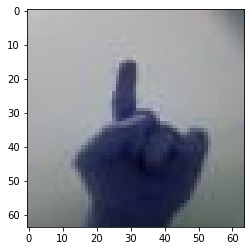

In [141]:
image=cv.imread('1finger.jpg',1)
plt.imshow(image)

In [148]:
image=image.reshape(1,64,64,3)

In [149]:
predicted = model.predict(image)

In [150]:
print("Predicted outcome is {}".format(np.argmax(predicted)))

Predicted outcome is 1
